## Chapter 1 Machine Learning Basics

Terminology: 
- featurs/ attributes, target variable
- instances
- training set, test set

Types:
- supervised learning
- unsupervised learning

Common algorithms for different tasks

In [12]:
# check directory
# import os
# os.listdir()

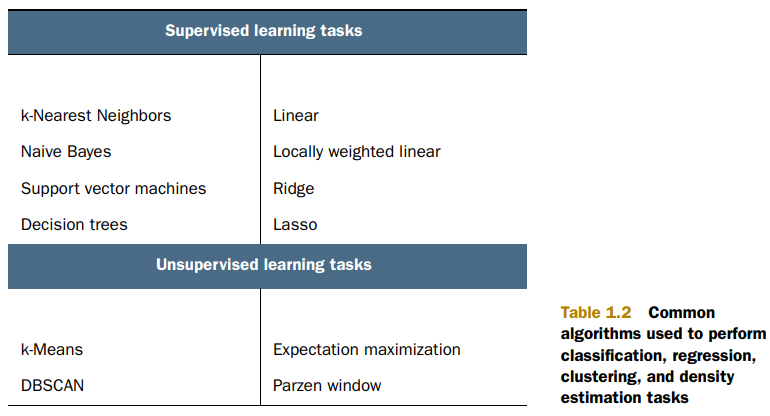

In [1]:
from IPython.display import Image
Image('common_algorithms_for_different_tasks.png')

# Image from: Harrington, P. (2012). Machine Learning In Action. Manning Publications.

Steps in developing a machine learning application:
1. Collect data
2. Prepare the input data
3. Analyze the input data
4. Trainthe algorithm
5. Test and tune the algorithm 
6. Use it

## Chapter 2 Classifying with k-Nearest Neighbors

k-Nearest Neighbors uses a distance metric to classify items.

- Pros: High accuracy, insensitive to outliers, no assumptions about data
- Cons: Computationally expensive, requires a lot of memory
- Works with: Numeric values, nominal values

### General approach to kNN
1. Collect: Any method.
2. Prepare: Numeric values are needed for a distance calculation. A structured data format is best.
3. Analyze: Any method.
4. Train: Does not apply to the kNN algorithm.
5. Test: Calculate the error rate.
6. Use: This application needs to get some input data and output structured numeric values. Next, the application runs the kNN algorithm on this input data and determines which class the input data should belong to. The application then takes some action on the calculated class.

In [2]:
# prepare and import data
from numpy import *
import operator

def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [4]:
group, labels = createDataSet()

In [5]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [6]:
labels

['A', 'A', 'B', 'B']

In [7]:
group[:, 0]

array([1., 1., 0., 0.])

In [8]:
group[:, 1]

array([1.1, 1. , 0. , 0.1])

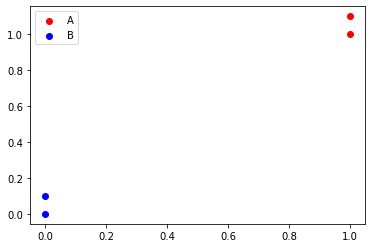

In [9]:
import matplotlib.pyplot as plt

plt.scatter(group[0:2,0], group[0:2,1], c = "red", label = 'A')
plt.scatter(group[2:,0], group[2:,1], c = "blue", label = 'B')
plt.legend()
plt.show()

### kNN Classifier

Now let's build a function to use the kNN algorithm to classify one piece of data called `inX`. 

Pseudocode for this function would look like this:

*For every point in our dataset*:
- calculate the distance between `inX` and the current point
- sort the distances in increasing order
- take k items with lowest distances to `inX`
- find the majority class among these items
- return the majority class as our prediction for the class of `inX`

In [10]:
def classifyKNN(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances ** 0.5
    sortedDisIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDisIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

In [11]:
group.shape

(4, 2)

#### the meaning of the tile function

tile (A, reps)

Purpose: to construct an array by repeating A the number of times given by reps.

##### Parameters
----------
A : array_like. The input array.

reps : array_like. The number of repetitions of `A` along each axis.
    
##### Examples

In [12]:
a = array([0, 1, 2])
res_1 = tile(a, 2) # np.tile
res_1

array([0, 1, 2, 0, 1, 2])

In [13]:
res_1.shape

(6,)

In [14]:
res_2 = tile(a, (1, 2))
res_2

array([[0, 1, 2, 0, 1, 2]])

In [15]:
res_2.shape

(1, 6)

In [16]:
res_3 = tile(a, (1, 2, 2))
res_3

array([[[0, 1, 2, 0, 1, 2],
        [0, 1, 2, 0, 1, 2]]])

In [17]:
res_3.shape

(1, 2, 6)

In [18]:
res_4 = tile(a, (3, 1))
res_4

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [19]:
res_4.shape

(3, 3)

The function `classifyKNN()` takes four inputs: 
- the input vector to classify called `inX`,
- our full matrix of training examples called `dataSet`, 
- a vector of labels called `labels`,
- and, finally, `k`, the number of nearest neighbors to use in the voting. 

The labels vector should have as many elements in it as there are rows in the dataSet matrix.

In [20]:
classifyKNN([0, 0], group, labels, 3)

'B'

In [21]:
# Now let's break down the function step by step
diffMat = tile([0,0], (4, 1)) - group
diffMat

array([[-1. , -1.1],
       [-1. , -1. ],
       [ 0. ,  0. ],
       [ 0. , -0.1]])

In [22]:
sqDiffMat = diffMat ** 2
sqDiffMat

array([[1.  , 1.21],
       [1.  , 1.  ],
       [0.  , 0.  ],
       [0.  , 0.01]])

In [23]:
sqDistances = sqDiffMat.sum(axis = 1) # aka calculate the Euclidian distance between inX and each point
sqDistances

array([2.21, 2.  , 0.  , 0.01])

In [24]:
sqDiffMat.sum(axis = 0)

array([2.  , 2.22])

In [25]:
distances = sqDistances ** 0.5
sortedDisIndicies = distances.argsort() # Returns the indices that would sort an array.
sortedDisIndicies

array([2, 3, 1, 0], dtype=int64)

In [26]:
distances

array([1.48660687, 1.41421356, 0.        , 0.1       ])

In [27]:
classCount = {}

for i in range(3):
    voteIlabel = labels[sortedDisIndicies[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

In [28]:
classCount

{'B': 2, 'A': 1}

In [29]:
sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
# sorted: return a new list containing all items from the iterable in ascending order.
sortedClassCount

[('B', 2), ('A', 1)]

In [30]:
sortedClassCount[0][0]

'B'

### How to test a classifier
To test out a classifier, we start with some known data but hide the answer from the classifier, and ask the classifier for its best guess. 

We can add up the number of times the classifier was wrong and divide it by the total number of tests we gave it. This will give us the **error rate**, which is a common measure to gauge how good a classifier is doing on a dataset. 

An error rate of 0 means we have a perfect classifier, and an error rate of 1.0 means the classifier is always wrong. 

### Example: improving matches from a dating site with kNN

#### labels:
- People Helen didn’t like
- People Helen liked in small doses 
- People Helen liked in large doses

#### features:
- Number of frequent flyer miles earned per year
- Percentage of time spent playing video games
- Liters of ice cream consumed per week

#### Steps:
1. Collect: Text file provided.
2. Prepare: Parse a text file in Python.
3. Analyze: Use Matplotlib to make 2D plots of our data. 
4. Train: Doesn’t apply to the kNN algorithm.
5. Test: Write a function to use some portion of the data Hellen gave us as test examples. The test examples are classified against the non-test examples. If the predicted class doesn’t match the real class, we’ll count that as an error.
6. Use: Build a simple command-line program Hellen can use to predict whether she’ll like someone based on a few inputs.

##### Step 1:  Prepare: parsing data from a text file

In [31]:
#  Text record to NumPy parsing code
def file2matrix(filename):
    fr = open(filename)
    arrayOfLines = fr.readlines()
    numberOfLines = len(arrayOfLines)
    numberOfFeaturs = len(arrayOfLines[0].strip().split('\t')) - 1
    returnMat = zeros((numberOfLines, numberOfFeaturs))
    classLabelVector = []
    index = 0
    for line in arrayOfLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:numberOfFeaturs]
        classLabelVector.append(listFromLine[-1])
        index += 1
    return returnMat, classLabelVector

In [32]:
datingDataMat, datingLabels = file2matrix('datingTestSet.txt')

In [33]:
datingDataMat[:5]

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       [7.5136000e+04, 1.3147394e+01, 4.2896400e-01],
       [3.8344000e+04, 1.6697880e+00, 1.3429600e-01]])

In [34]:
datingLabels[:5]

['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike']

In [35]:
# let's break down the function
fr = open('datingTestSet.txt')
arrayOfLines = fr.readlines()
arrayOfLines[:3], type(arrayOfLines)

(['40920\t8.326976\t0.953952\tlargeDoses\n',
  '14488\t7.153469\t1.673904\tsmallDoses\n',
  '26052\t1.441871\t0.805124\tdidntLike\n'],
 list)

In [36]:
arrayOfLines[0]

'40920\t8.326976\t0.953952\tlargeDoses\n'

In [37]:
arrayOfLines[0].strip()

'40920\t8.326976\t0.953952\tlargeDoses'

In [38]:
arrayOfLines[0].strip().split('\t')

['40920', '8.326976', '0.953952', 'largeDoses']

##### Step 2: Analyze: creating scatter plots with Matplotlib

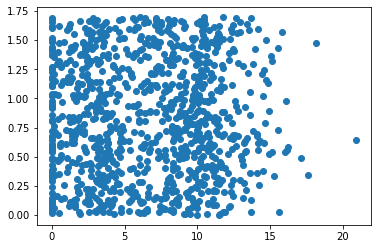

In [39]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
plt.show()

We’ve plotted the second and third columns from the datingDataMat matrix. 

These are all of our values for the features “Percentage of time spent playing video games” and “Liters of ice cream consumed weekly” for all the classes put together.

Now let's plot the class values in color or use some other markers to get a better understanding of the data. The Matplotlib scatter function has additional inputs we can use to customize the markers. 

In [40]:
datingLabel2num = {'largeDoses': 1, 'smallDoses': 2, 'didntLike': 3}

In [41]:
type(datingLabels)

list

In [42]:
datingLabelNum = [datingLabel2num[key] for key in datingLabels]
datingLabelNum[:5]

[1, 2, 3, 3, 3]

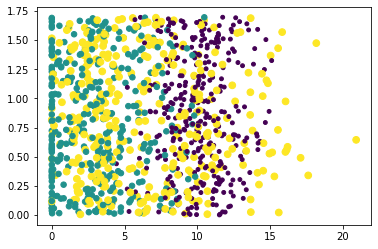

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*array(datingLabelNum), 15.0*array(datingLabelNum))
plt.show()

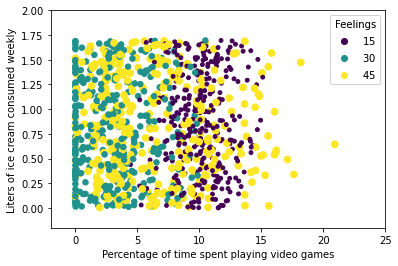

In [44]:
# Now let's add labels for x and y axes, and legends to explain the colors
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*array(datingLabelNum), 15.0*array(datingLabelNum))
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Feelings")
ax.add_artist(legend1)
ax.axis([-2,25,-0.2,2.0])
plt.xlabel('Percentage of time spent playing video games')
plt.ylabel('Liters of ice cream consumed weekly')
plt.show()

C:\Users\zxy23\Anaconda3\lib\site-packages\matplotlib\collections.py:1053: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if num == "auto":


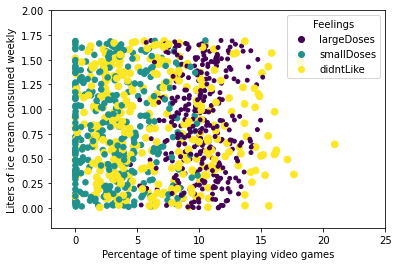

In [45]:
# Now let's try to convert numbers to the original feelings
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*array(datingLabelNum), 15.0*array(datingLabelNum))
handles = scatter.legend_elements(num=15.0*array(datingLabelNum))[0]  # extract the handles from the existing scatter plot

ax.legend(title='Feelings', handles=handles, labels=datingLabel2num.keys())

ax.axis([-2,25,-0.2,2.0])
plt.xlabel('Percentage of time spent playing video games')
plt.ylabel('Liters of ice cream consumed weekly')
plt.show()

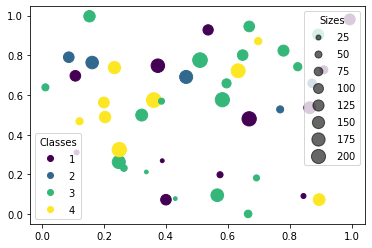

In [48]:
# two examples for ploting from matplotlib scatter plot
import numpy as np

N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s) # c: color; s: shape

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

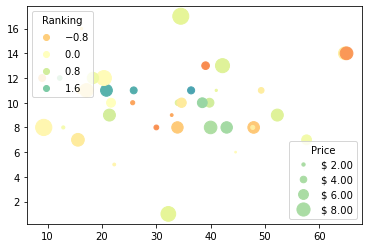

In [49]:
volume = np.random.rayleigh(27, size=40)
amount = np.random.poisson(10, size=40)
ranking = np.random.normal(size=40)
price = np.random.uniform(1, 10, size=40)

fig, ax = plt.subplots()

# Because the price is much too small when being provided as size for ``s``,
# we normalize it to some useful point sizes, s=0.3*(price*3)**2
scatter = ax.scatter(volume, amount, c=ranking, s=0.3*(price*3)**2,
                     vmin=-3, vmax=3, cmap="Spectral")

# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="Ranking")
ax.add_artist(legend1)

# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="$ {x:.2f}",
          func=lambda s: np.sqrt(s/.3)/3)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Price")

plt.show()

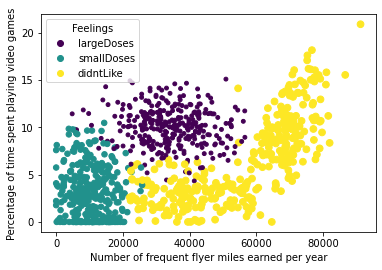

In [50]:
# Now let's try to plot with the first and second features
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(datingDataMat[:,0], datingDataMat[:,1], 15.0*array(datingLabelNum), 15.0*array(datingLabelNum))
handles = scatter.legend_elements(num=15.0*array(datingLabelNum))[0]  # extract the handles from the existing scatter plot

ax.legend(title='Feelings', handles=handles, labels=datingLabel2num.keys())

plt.xlabel('Number of frequent flyer miles earned per year')
plt.ylabel('Percentage of time spent playing video games')
plt.show()

##### Step 3: Prepare: normalizing numeric values

When dealing with values that lie in different ranges, it’s common to normalize them. Common ranges to normalize them to are 0 to 1 or -1 to 1. 

To scale everything from 0 to 1, we need to apply the following formula: 
`newValue` = (`oldValue` - `min`)/(`max` - `min`)

In the normalization procedure, the variables `min` and `max` are the smallest and largest values in the dataset. This scaling adds some complexity to our classifier, but it’s worth it to get good results. 

Let’s create a new function called autoNorm() to automatically normalize the data to values between 0 and 1. 

In [51]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))  # element-wise division
    return normDataSet, ranges, minVals

Note that in other numeric software packages, the `/` operator can be used for matrix division, but in NumPy you need to use `linalg.solve(matA, matB)` for matrix division. 

In [52]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [53]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [54]:
normMat.shape

(1000, 3)

In [55]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [56]:
minVals

array([0.      , 0.      , 0.001156])

##### Step 4: Test: testing the classifier as a whole program

One common task in machine learning is evaluating an algorithm’s accuracy. 

One way we can use the existing data is to take some portion, say 90%, to train the classifier. Then we’ll take the remaining 10% to test the classifier and see how accurate it is. There are more advanced ways of doing this, which we’ll address later, but for now let’s use this method. 

The 10% to be held back should be randomly selected. Our data isn’t stored in a specific sequence, so we can take the first 10% or last 10% without upsetting any statistics professors. 

We can measure the performance of a classifier with the **error rate**. In classification, the error rate is the number of misclassified pieces of data divided by the total number of data points tested. An error rate of 0 means we have a perfect classifier, and an error rate of 1.0 means the classifier is always wrong. 

Here we’ll measure the error rate with a counter that’s incremented every time a piece of data is misclassified. The total number of errors divided by the total number of data points tested will give us the error rate. 

To test the classifier, let's create a new function called datingClassTest. 

In [64]:
def datingClassTest():
    hoRatio = 0.1
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classifyKNN(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %s, the real answer is: %s" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): 
            errorCount += 1.0
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))

In [65]:
datingClassTest()

the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: smallDoses, the real answer is: smallDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: largeDoses, the real answer is: largeDoses
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: didntLike, the real answer is: didntLike
the classifier came back with: smallDoses, the real answer is: smallDoses
the classifier came back with: didntLike, the real a

The total **error rate** for this classifier on this dataset with these settings is 5.0%. 

We can also experiment with different `hoRatios` and different values of `k` inside the `datingClassTest` function. How does the error change as `hoRatio` is increased? Note that the results will vary by algorithm, dataset, and settings. 

In [68]:
# rewrite the function to test with different hoRatio and k
def datingClassTest(hoRatio, k):
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classifyKNN(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m], k)
        if (classifierResult != datingLabels[i]): 
            errorCount += 1.0
    return errorCount/float(numTestVecs)

In [69]:
hoRatioList = [0.1, 0.3, 0.5]
kList = [3, 5, 8]
datingErrorList = []

for ratio in hoRatioList:
    for k in kList:
        datingError = datingClassTest(ratio, k)
        datingErrorList.append(datingError)

In [70]:
datingErrorList

[0.05, 0.05, 0.05, 0.08333333333333333, 0.07, 0.08, 0.066, 0.064, 0.06]

In [72]:
mean(datingErrorList)

0.06370370370370372

##### Step 5: Use: putting together a useful system

In [79]:
def classifyPerson():
    datingLabel2res = {'largeDoses': 'in large doses', 'smallDoses': 'in small doses', 'didntLike': 'not at all'}
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier mies earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classifyKNN((inArr - minVals)/ranges, normMat, datingLabels, 3)
    print("You will probably like this person: ", datingLabel2res.get(classifierResult))

In [80]:
classifyPerson()

percentage of time spent playing video games?10
frequent flier mies earned per year?1000
liters of ice cream consumed per year?0.5
You will probably like this person:  in small doses


### Example: a handwriting recognition system
Now let's see how to apply kNN to things as diverse as images where the data is in binary form. 